# Network Traffic Classification - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time 
import plotly.figure_factory as ff

## Read the data into pandas Datafame

In [2]:
data = pd.read_csv("data/Dataset-Unicauca-Version2-87Atts.csv")
data.head()

Flow.ID      Source.IP  Source.Port  \
0    172.19.1.46-10.200.7.7-52422-3128-6    172.19.1.46        52422   
1    172.19.1.46-10.200.7.7-52422-3128-6     10.200.7.7         3128   
2   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
3   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
4  192.168.72.43-10.200.7.7-55961-3128-6  192.168.72.43        55961   

  Destination.IP  Destination.Port  Protocol           Timestamp  \
0     10.200.7.7              3128         6  26/04/201711:11:17   
1    172.19.1.46             52422         6  26/04/201711:11:17   
2   10.200.7.217             38848         6  26/04/201711:11:17   
3   10.200.7.217             38848         6  26/04/201711:11:17   
4     10.200.7.7              3128         6  26/04/201711:11:17   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  Active.Std  \
0          45523                 22                      55  ...         0.0   
1              1                  2                       0  ...         0.0   
2              1                  3                       0  ...         0.0   
3            217                  1                       3  ...         0.0   
4          78068                  5                       0  ...         0.0   

   Active.Max  Active.Min  Idle.Mean  Idle.Std  Idle.Max  Idle.Min   Label  \
0         0.0         0.0        0.0       0.0       0.0       0.0  BENIGN   
1         0.0         0.0        0.0       0.0       0.0       0.0  BENIGN   
2         0.0         0.0        0.0       0.0       0.0       0.0  BENIGN   
3         0.0         0.0        0.0       0.0       0.0       0.0  BENIGN   
4         0.0         0.0        0.0       0.0       0.0       0.0  BENIGN   

   L7Protocol  ProtocolName  
0         131    HTTP_PROXY  
1         131    HTTP_PROXY  
2           7          HTTP  
3           7          HTTP  
4         131    HTTP_PROXY  

[5 rows x 87 columns]

## Understanding the data

**The dataset has 3.5M rows and 87 columns**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [4]:
data.shape

(3577296, 87)

## No missing information

In [5]:
data.isna().sum().sum()

0

## Dropped the duplicates

In [6]:
data.duplicated().sum()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
data.shape

(3569152, 87)

## Drop zero values in columns

In [8]:
data = data.loc[:, (data != 0).any(axis=0)]

In [9]:
data.shape

(3569152, 77)

## Inspect the unique values in every columns

In [10]:
unique_df = data.agg(['unique']).T
unique_df

unique
Flow.ID           [172.19.1.46-10.200.7.7-52422-3128-6, 10.200.7...
Source.IP         [172.19.1.46, 10.200.7.7, 50.31.185.39, 192.16...
Source.Port       [52422, 3128, 80, 55961, 55963, 51848, 443, 55...
Destination.IP    [10.200.7.7, 172.19.1.46, 10.200.7.217, 172.19...
Destination.Port  [3128, 52422, 38848, 50004, 57300, 57740, 5022...
...                                                             ...
Idle.Max          [0.0, 5673580.0, 5592156.0, 5593802.0, 5472177...
Idle.Min          [0.0, 5673580.0, 5592156.0, 5593802.0, 5472177...
Label                                                      [BENIGN]
L7Protocol        [131, 7, 130, 91, 126, 124, 119, 40, 121, 147,...
ProtocolName      [HTTP_PROXY, HTTP, HTTP_CONNECT, SSL, GOOGLE, ...

[77 rows x 1 columns]

**The data has 78 unique protocol names**

In [11]:
unique_protos = unique_df.loc['ProtocolName']
unique_protos.to_list(), len(unique_protos.to_list())

([array(['HTTP_PROXY', 'HTTP', 'HTTP_CONNECT', 'SSL', 'GOOGLE', 'YOUTUBE',
         'FACEBOOK', 'CONTENT_FLASH', 'DROPBOX', 'WINDOWS_UPDATE', 'AMAZON',
         'MICROSOFT', 'TOR', 'GMAIL', 'YAHOO', 'MSN', 'SSL_NO_CERT',
         'SKYPE', 'MS_ONE_DRIVE', 'MSSQL', 'TWITTER', 'APPLE_ICLOUD',
         'CLOUDFLARE', 'UBUNTUONE', 'OFFICE_365', 'WIKIPEDIA', 'OPENSIGNAL',
         'DNS', 'HTTP_DOWNLOAD', 'WHATSAPP', 'APPLE_ITUNES', 'FTP_DATA',
         'CITRIX', 'APPLE', 'MQTT', 'INSTAGRAM', 'EBAY', 'GOOGLE_MAPS',
         'IP_ICMP', 'NTP', 'TEAMVIEWER', 'SPOTIFY', 'EASYTAXI',
         'MAIL_IMAPS', 'TWITCH', 'NETFLIX', 'SSH', 'SIMET',
         'UNENCRYPED_JABBER', 'WAZE', 'UPNP', 'EDONKEY', 'OSCAR', 'ORACLE',
         'DEEZER', 'OPENVPN', 'WHOIS_DAS', 'SKINNY', 'STARCRAFT', 'NFS',
         'RTMP', 'TEAMSPEAK', 'SNMP', '99TAXI', 'QQ', 'TELEGRAM',
         'FTP_CONTROL', 'LOTUS_NOTES', 'H323', 'CITRIX_ONLINE', 'LASTFM',
         'IP_OSPF', 'CNN', 'BGP', 'RADIUS', 'SOCKS', 'BITTORRENT', 'TIMMEU

## Bar plot of applications 

**Inputs: top number of apps, dataframe**

In [12]:
import matplotlib.pyplot as plt

def bar_top(top_num, df):
    freq_protocol = df['ProtocolName'].value_counts()
    app_name = freq_protocol.index.tolist()
    freq_count = freq_protocol.tolist()

    # Top_num application names
    plt.bar(app_name[:top_num], freq_count[:top_num])
    plt.xlabel("Application Name")
    plt.ylabel("Frequency")
    plt.title(f"Top {top_num} Applications")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

**The data is highly unbalanced. Need to balance this a bit**

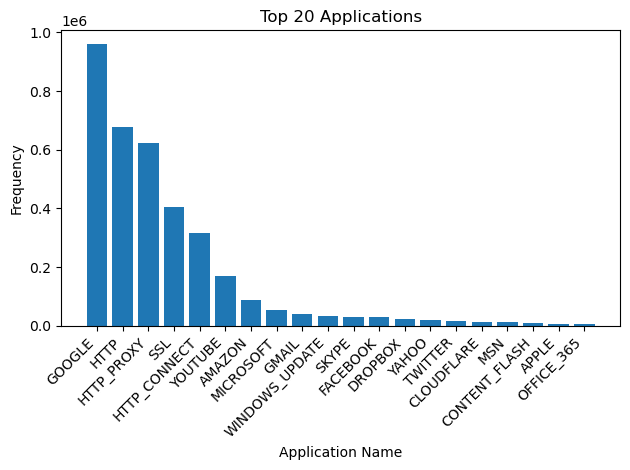

In [13]:
bar_top(20, data)

## Balancing the data

**Lets look at the top 20 applications**

In [14]:
top20 = []
freq_protocol = data['ProtocolName'].value_counts()
app_name = freq_protocol.index.tolist()
freq_count = freq_protocol.tolist()

for i in zip(app_name[:20], freq_count[:20]): 
    top20.append(i)

top20

[('GOOGLE', 959054),
 ('HTTP', 676987),
 ('HTTP_PROXY', 622007),
 ('SSL', 404822),
 ('HTTP_CONNECT', 317490),
 ('YOUTUBE', 170775),
 ('AMAZON', 86873),
 ('MICROSOFT', 54706),
 ('GMAIL', 40260),
 ('WINDOWS_UPDATE', 34470),
 ('SKYPE', 30654),
 ('FACEBOOK', 29014),
 ('DROPBOX', 25102),
 ('YAHOO', 21267),
 ('TWITTER', 18258),
 ('CLOUDFLARE', 14737),
 ('MSN', 14477),
 ('CONTENT_FLASH', 8589),
 ('APPLE', 7614),
 ('OFFICE_365', 5940)]

**To balance this a bit, we can sample data from applications, while taking all the data for the ones with smaller data**

Choosing 14k samples at random, mostly based on MSN application

In [15]:
# Taking a random sample of min(10000, count) data from the top 20 applications
listofDataFrames = []
for app, count in top20:
    listofDataFrames.append(pd.DataFrame(data[data['ProtocolName'] == app].sample(n = min(count, 10000))))

sampledData = pd.concat(listofDataFrames)
sampledData.shape

(192143, 77)

**This is a lot more balanced now**

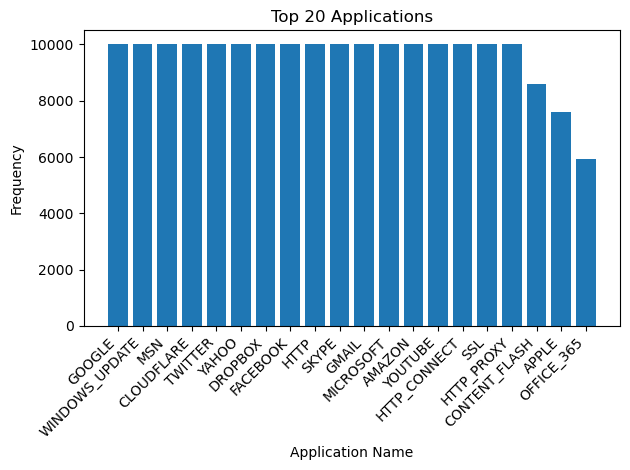

In [16]:
bar_top(20, sampledData)

In [17]:
sampledData

Flow.ID        Source.IP  \
624894   216.58.222.109-10.200.7.217-443-58563-6     10.200.7.217   
2665818   192.168.32.121-10.200.7.7-64355-3128-6   192.168.32.121   
2782395   172.217.29.66-10.200.7.217-443-59016-6    172.217.29.66   
1439358   216.58.222.102-10.200.7.218-80-41224-6     10.200.7.218   
2493426   192.168.110.11-10.200.7.4-61280-3128-6   192.168.110.11   
...                                          ...              ...   
835018     192.168.72.75-10.200.7.6-49850-3128-6    192.168.72.75   
3358856      10.200.7.199-13.107.4.50-50675-80-6     10.200.7.199   
3142941    192.168.180.7-10.200.7.8-49584-3128-6    192.168.180.7   
1841660  192.168.220.105-10.200.7.8-49447-3128-6  192.168.220.105   
3275565      10.200.7.196-13.107.4.50-41535-80-6      13.107.4.50   

         Source.Port  Destination.IP  Destination.Port  Protocol  \
624894         58563  216.58.222.109               443         6   
2665818        64355      10.200.7.7              3128         6   
2782395          443    10.200.7.217             59016         6   
1439358        41224  216.58.222.102                80         6   
2493426        61280      10.200.7.4              3128         6   
...              ...             ...               ...       ...   
835018         49850      10.200.7.6              3128         6   
3358856        50675     13.107.4.50                80         6   
3142941        49584      10.200.7.8              3128         6   
1841660        49447      10.200.7.8              3128         6   
3275565           80    10.200.7.196             41535         6   

                  Timestamp  Flow.Duration  Total.Fwd.Packets  \
624894   27/04/201709:09:37         855698                 38   
2665818  11/05/201710:40:27      119725229                299   
2782395  11/05/201711:09:08            675                  1   
1439358  27/04/201706:05:40            124                  1   
2493426  11/05/201710:06:28      104614548                  3   
...                     ...            ...                ...   
835018   27/04/201709:54:58          16336                  4   
3358856  15/05/201704:40:37      119805833                280   
3142941  15/05/201709:53:51            305                  1   
1841660  28/04/201710:17:08          64846                  7   
3275565  15/05/201711:01:49      119890191                313   

         Total.Backward.Packets  ...    Active.Std  Active.Max  Active.Min  \
624894                       29  ...  0.000000e+00         0.0         0.0   
2665818                     410  ...  1.316093e+06   2064379.0    203143.0   
2782395                       3  ...  0.000000e+00         0.0         0.0   
1439358                       3  ...  0.000000e+00         0.0         0.0   
2493426                       5  ...  7.427202e+01       158.0        10.0   
...                         ...  ...           ...         ...         ...   
835018                        3  ...  0.000000e+00         0.0         0.0   
3358856                     226  ...  1.843840e+07  36876869.0        50.0   
3142941                       1  ...  0.000000e+00         0.0         0.0   
1841660                       6  ...  0.000000e+00         0.0         0.0   
3275565                     387  ...  0.000000e+00         0.0         0.0   

            Idle.Mean      Idle.Std    Idle.Max    Idle.Min   Label  \
624894   0.000000e+00  0.000000e+00         0.0         0.0  BENIGN   
2665818  5.862836e+07  3.935572e+05  58906650.0  58350076.0  BENIGN   
2782395  0.000000e+00  0.000000e+00         0.0         0.0  BENIGN   
1439358  0.000000e+00  0.000000e+00         0.0         0.0  BENIGN   
2493426  3.487130e+07  1.755710e+07  45015024.0  14598109.0  BENIGN   
...               ...           ...         ...         ...     ...   
835018   0.000000e+00  0.000000e+00         0.0         0.0  BENIGN   
3358856  2.015909e+07  1.092140e+07  29520123.0   7379372.0  BENIGN   
3142941  0.000000e+00  0.000000e+00   

## Prep the data further

- **Reset index and shuffle the data so that all the apps are not clustered together**
- **Store the result into data now. This is what we will be using from now on**

In [18]:
data = sampledData.sample(frac=1).reset_index(drop=True)
data

Flow.ID       Source.IP  Source.Port  \
0       213.239.207.69-10.200.7.195-80-43315-6    10.200.7.195        43315   
1          10.200.7.196-31.13.73.7-35682-443-6    10.200.7.196        35682   
2         179.1.4.209-10.200.7.217-443-41700-6    10.200.7.217        41700   
3        192.168.42.58-10.200.7.6-52186-3128-6   192.168.42.58        52186   
4        192.168.60.39-10.200.7.7-50932-3128-6   192.168.60.39        50932   
...                                        ...             ...          ...   
192138   192.168.32.84-10.200.7.8-51040-3128-6   192.168.32.84        51040   
192139     10.200.7.218-13.107.4.50-53630-80-6    10.200.7.218        53630   
192140   192.168.10.62-10.200.7.7-52409-3128-6   192.168.10.62        52409   
192141  192.168.180.16-10.200.7.9-57374-3128-6  192.168.180.16        57374   
192142  213.239.207.69-10.200.7.195-80-35711-6    10.200.7.195        35711   

        Destination.IP  Destination.Port  Protocol           Timestamp  \
0       213.239.207.69                80         6  28/04/201709:37:25   
1           31.13.73.7               443         6  11/05/201709:58:37   
2          179.1.4.209               443         6  27/04/201711:25:40   
3           10.200.7.6              3128         6  26/04/201703:03:38   
4           10.200.7.7              3128         6  27/04/201709:52:26   
...                ...               ...       ...                 ...   
192138      10.200.7.8              3128         6  27/04/201708:24:32   
192139     13.107.4.50                80         6  27/04/201707:36:51   
192140      10.200.7.7              3128         6  11/05/201703:32:39   
192141      10.200.7.9              3128         6  27/04/201711:27:02   
192142  213.239.207.69                80         6  09/05/201711:33:31   

        Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  \
0              630274                  8                       6  ...   
1              422865                  2                       0  ...   
2               10102                  1                       2  ...   
3              930832                  4                       3  ...   
4             7388584                831                       0  ...   
...               ...                ...                     ...  ...   
192138       16582229                 22                      62  ...   
192139       74435828               1759                    5017  ...   
192140            331                  1                       2  ...   
192141      111163967                 18                      57  ...   
192142         682655                  9                       7  ...   

           Active.Std  Active.Max  Active.Min     Idle.Mean       Idle.Std  \
0            0.000000         0.0         0.0  0.000000e+00       0.000000   
1            0.000000         0.0         0.0  0.000000e+00       0.000000   
2            0.000000         0.0         0.0  0.000000e+00       0.000000   
3            0.000000         0.0         0.0  0.000000e+00       0.000000   
4            0.000000         0.0         0.0  0.000000e+00       0.000000   
...               ...         ...         ...           ...            ...   
192138       0.000000   1516314.0   1516314.0  1.506548e+07       0.000000   
192139       0.000000         0.0         0.0  0.000000e+00       0.000000   
192140       0.000000         0.0         0.0  0.000000e+00       0.000000   
192141  576882.858872   1920085.0         1.0  9.923422e+06  301433.813682   
192142       0.000000         0.0         0.0  0.000000e+00       0.000000   

          Idle.Max    Idle.Min   Label  L7Protocol    ProtocolName  
0              0.0         0.0  BENIGN          40   CONTENT_FLASH  
1              0.0         0.0  BENIGN         119        FACEBOOK  
2              0.0         0.0  BENIGN         124         YOUTUBE  
3              0.0         0.0  BENIGN         219      OFFICE_365  
4              0.0         0.0  BENIGN    

**Data now has 192143 rows and 87 columns**

In [19]:
data.describe()

Source.Port  Destination.Port       Protocol  Flow.Duration  \
count  192143.000000     192143.000000  192143.000000   1.921430e+05   
mean    42649.799160       7035.486414       6.004465   2.262087e+07   
std     18405.161779      15515.466168       0.221585   3.695402e+07   
min        53.000000         53.000000       6.000000   1.000000e+00   
25%     38330.000000        443.000000       6.000000   3.019500e+03   
50%     49860.000000       3128.000000       6.000000   7.239560e+05   
75%     54100.500000       3128.000000       6.000000   3.323461e+07   
max     65534.000000      65512.000000      17.000000   1.200000e+08   

       Total.Fwd.Packets  Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
count      192143.000000           192143.000000                 1.921430e+05   
mean           64.862384               77.052341                 3.702672e+04   
std          1218.091975             1065.499877                 1.655983e+06   
min             1.000000                0.000000                 0.000000e+00   
25%             2.000000                1.000000                 6.000000e+00   
50%             6.000000                5.000000                 5.100000e+02   
75%            14.000000               15.000000                 1.542000e+03   
max        233033.000000           134496.000000                 3.933213e+08   

       Total.Length.of.Bwd.Packets  Fwd.Packet.Length.Max  \
count                 1.921430e+05          192143.000000   
mean                  1.117892e+05             521.883269   
std                   1.891328e+06            1000.167864   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00               6.000000   
50%                   6.010000e+02             267.000000   
75%                   5.070000e+03             598.000000   
max                   3.259112e+08           24616.000000   

       Fwd.Packet.Length.Min  ...  min_seg_size_forward   Active.Mean  \
count          192143.000000  ...         192143.000000  1.921430e+05   
mean                6.856451  ...             27.225202  3.629252e+05   
std                75.304930  ...              5.878323  3.104145e+06   
min                 0.000000  ...             20.000000  0.000000e+00   
25%                 0.000000  ...             20.000000  0.000000e+00   
50%                 0.000000  ...             32.000000  0.000000e+00   
75%                 0.000000  ...             32.000000  0.000000e+00   
max             10220.000000  ...             44.000000  1.115558e+08   

         Active.Std    Active.Max    Active.Min     Idle.Mean      Idle.Std  \
count  1.921430e+05  1.921430e+05  1.921430e+05  1.921430e+05  1.921430e+05   
mean   1.646326e+05  5.529357e+05  2.452262e+05  7.691672e+06  1.009581e+06   
std    1.524932e+06  3.934813e+06  2.843299e+06  1.795277e+07  4.297940e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.297136e+07  1.115558e+08  1.115558e+08  1.199997e+08  7.738746e+07   

           Idle.Max      Idle.Min     L7Protocol  
count  1.921430e+05  1.921430e+05  192143.000000  
mean   8.586558e+06  6.819857e+06     123.972146  
std    1.941287e+07  1.711244e+07      52.517847  
min    0.000000e+00  0.000000e+00       7.000000  
25%    0.000000e+00  0.000000e+00      91.000000  
50%    0.000000e+00  0.000000e+00     124.000000  
75%    0.000000e+00  0.000000e+00     140.000000  
max    1.199997e+08  1.199997e+08     220.000000  

[8 rows x 71 columns]

In [20]:
data.shape

(192143, 77)

In [21]:
data.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192143 entries, 0 to 192142
Data columns (total 77 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  Bw

**Encode the ProtocolName column using LabelEncoder**

This is the target variable for classification

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(data['ProtocolName'])
data['ProtocolLabel'] = le.transform(data['ProtocolName'])

In [23]:
data

Flow.ID       Source.IP  Source.Port  \
0       213.239.207.69-10.200.7.195-80-43315-6    10.200.7.195        43315   
1          10.200.7.196-31.13.73.7-35682-443-6    10.200.7.196        35682   
2         179.1.4.209-10.200.7.217-443-41700-6    10.200.7.217        41700   
3        192.168.42.58-10.200.7.6-52186-3128-6   192.168.42.58        52186   
4        192.168.60.39-10.200.7.7-50932-3128-6   192.168.60.39        50932   
...                                        ...             ...          ...   
192138   192.168.32.84-10.200.7.8-51040-3128-6   192.168.32.84        51040   
192139     10.200.7.218-13.107.4.50-53630-80-6    10.200.7.218        53630   
192140   192.168.10.62-10.200.7.7-52409-3128-6   192.168.10.62        52409   
192141  192.168.180.16-10.200.7.9-57374-3128-6  192.168.180.16        57374   
192142  213.239.207.69-10.200.7.195-80-35711-6    10.200.7.195        35711   

        Destination.IP  Destination.Port  Protocol           Timestamp  \
0       213.239.207.69                80         6  28/04/201709:37:25   
1           31.13.73.7               443         6  11/05/201709:58:37   
2          179.1.4.209               443         6  27/04/201711:25:40   
3           10.200.7.6              3128         6  26/04/201703:03:38   
4           10.200.7.7              3128         6  27/04/201709:52:26   
...                ...               ...       ...                 ...   
192138      10.200.7.8              3128         6  27/04/201708:24:32   
192139     13.107.4.50                80         6  27/04/201707:36:51   
192140      10.200.7.7              3128         6  11/05/201703:32:39   
192141      10.200.7.9              3128         6  27/04/201711:27:02   
192142  213.239.207.69                80         6  09/05/201711:33:31   

        Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  \
0              630274                  8                       6  ...   
1              422865                  2                       0  ...   
2               10102                  1                       2  ...   
3              930832                  4                       3  ...   
4             7388584                831                       0  ...   
...               ...                ...                     ...  ...   
192138       16582229                 22                      62  ...   
192139       74435828               1759                    5017  ...   
192140            331                  1                       2  ...   
192141      111163967                 18                      57  ...   
192142         682655                  9                       7  ...   

        Active.Max  Active.Min     Idle.Mean       Idle.Std    Idle.Max  \
0              0.0         0.0  0.000000e+00       0.000000         0.0   
1              0.0         0.0  0.000000e+00       0.000000         0.0   
2              0.0         0.0  0.000000e+00       0.000000         0.0   
3              0.0         0.0  0.000000e+00       0.000000         0.0   
4              0.0         0.0  0.000000e+00       0.000000         0.0   
...            ...         ...           ...            ...         ...   
192138   1516314.0   1516314.0  1.506548e+07       0.000000  15065478.0   
192139         0.0         0.0  0.000000e+00       0.000000         0.0   
192140         0.0         0.0  0.000000e+00       0.000000         0.0   
192141   1920085.0         1.0  9.923422e+06  301433.813682  10019956.0   
192142         0.0         0.0  0.000000e+00       0.000000         0.0   

          Idle.Min   Label  L7Protocol    ProtocolName  ProtocolLabel  
0              0.0  BENIGN          40   CONTENT_FLASH              3  
1              0.0  BENIGN         119        FACEBOOK              5  
2              0.0  BENIGN         124         YOUTUBE             19  
3              0.0  BENIGN         219      OFFICE_365             13  
4              0.0  BENIGN         147  WINDOWS_UPDATE         

## Remove unwanted columns

- Flow.ID
- Source.IP
- Source.Port
- Destination.IP
- Destination.Port
- Label
- Timestamp
- Source.Port
- Protocol
- L7 Protocol
- Flow Duration

In [24]:
data = data.drop(['Flow.ID','Source.IP',
                  'Label', 'Timestamp', 
                  'Source.Port', 'Destination.IP', 
                  'Destination.Port', 'Protocol', 
                  'L7Protocol', 'Flow.Duration'], axis=1)

In [25]:
data.shape

(192143, 68)

## Remove columns that only have a 0 value

In [26]:
type(unique_df.index)
for i, row in unique_df.iterrows():
    if row.loc['unique'][0] == 0:
       data = data.drop([i], axis=1)
data.shape

(192143, 52)

## Feature selection based on inter-quartile distance

In [27]:
X = data.drop(['ProtocolLabel'], axis=1).drop(['ProtocolName'], axis=1)
X.shape

(192143, 50)

In [28]:
from sklearn.preprocessing import StandardScaler

X_scale_np = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale_np, columns=X.columns)
X_scale.describe()

Total.Fwd.Packets  Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
count       1.921430e+05            1.921430e+05                 1.921430e+05   
mean       -5.066245e-18           -3.439130e-18                -1.331276e-18   
std         1.000003e+00            1.000003e+00                 1.000003e+00   
min        -5.242835e-02           -7.231586e-02                -2.235943e-02   
25%        -5.160739e-02           -7.137733e-02                -2.235580e-02   
50%        -4.832356e-02           -6.762322e-02                -2.205145e-02   
75%        -4.175589e-02           -5.823793e-02                -2.142825e-02   
max         1.912571e+02            1.261561e+02                 2.374936e+02   

       Total.Length.of.Bwd.Packets  Fwd.Packet.Length.Max  \
count                 1.921430e+05           1.921430e+05   
mean                  1.627115e-18          -2.736512e-18   
std                   1.000003e+00           1.000003e+00   
min                  -5.910635e-02          -5.217970e-01   
25%                  -5.910635e-02          -5.157980e-01   
50%                  -5.878858e-02          -2.548412e-01   
75%                  -5.642569e-02           7.610415e-02   
max                   1.722601e+02           2.409014e+01   

       Fwd.Packet.Length.Min  Fwd.Packet.Length.Mean  Bwd.Packet.Length.Max  \
count           1.921430e+05            1.921430e+05           1.921430e+05   
mean            1.124189e-17            3.365170e-17          -3.172875e-17   
std             1.000003e+00            1.000003e+00           1.000003e+00   
min            -9.104940e-02           -4.915346e-01          -5.581091e-01   
25%            -9.104940e-02           -4.652525e-01          -5.581091e-01   
50%            -9.104940e-02           -2.587498e-01          -4.358294e-01   
75%            -9.104940e-02            7.134147e-02           1.104851e-01   
max             1.356242e+02            4.427573e+01           1.303625e+01   

       Bwd.Packet.Length.Min  Bwd.Packet.Length.Mean  ...  \
count           1.921430e+05            1.921430e+05  ...   
mean            4.178728e-18            1.140460e-16  ...   
std             1.000003e+00            1.000003e+00  ...   
min            -1.701503e-01           -6.325372e-01  ...   
25%            -1.701503e-01           -6.325372e-01  ...   
50%            -1.701503e-01           -5.118490e-01  ...   
75%            -1.701503e-01            2.919812e-01  ...   
max             3.028509e+01            1.239340e+01  ...   

       Avg.Bwd.Segment.Size  Fwd.Header.Length.1  Subflow.Fwd.Packets  \
count          1.921430e+05         1.921430e+05         1.921430e+05   
mean           4.615091e-17        -1.368256e-18        -5.066245e-18   
std            1.000003e+00         1.000003e+00         1.000003e+00   
min           -6.325372e-01        -5.024214e-02        -5.242835e-02   
25%           -6.325372e-01        -4.916156e-02        -5.160739e-02   
50%           -5.118490e-01        -4.559564e-02        -4.832356e-02   
75%            2.919812e-01        -4.051691e-02        -4.175589e-02   
max            1.239340e+01         2.036653e+02         1.912571e+02   

       Subflow.Fwd.Bytes  Subflow.Bwd.Packets  Subflow.Bwd.Bytes  \
count       1.921430e+05         1.921430e+05       1.921430e+05   
mean       -1.331276e-18        -3.439130e-18       1.627115e-18   
std         1.000003e+00         1.000003e+00       1.000003e+00   
min        -2.235943e-02        -7.231586e-02      -5.910635e-02   
25%        -2.235580e-02        -7.137733e-02      -5.910635e-02   
50%        -2.205145e-02        -6.762322e-02      -5.878858e-02   
75%        -2.142825e-02        -5.823793e-02      -5.642569e-02   
max         2.374936e+02         1.261561e+02       1.722601e+02   

       Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
count            1.921430e+05             1.921430e+05      1.921430e+05   
mean            -7.610462e-17            -

### Sort based on inter-quartile range (iqr)

In [29]:
dx = X_scale.describe()
sx = (dx.loc['75%', :] - dx.loc['25%', :]).sort_values(ascending=False)
top_30_features_by_iqr = sx.index[:30]
top_30_features_by_iqr

Index(['min_seg_size_forward', 'ACK.Flag.Count', 'Packet.Length.Std',
       'Bwd.Packet.Length.Std', 'Average.Packet.Size',
       'Init_Win_bytes_forward', 'Packet.Length.Mean',
       'Bwd.Packet.Length.Mean', 'Avg.Bwd.Segment.Size', 'Flow.IAT.Max',
       'Max.Packet.Length', 'Down.Up.Ratio', 'Bwd.Packet.Length.Max',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Mean',
       'Avg.Fwd.Segment.Size', 'Fwd.IAT.Total', 'Packet.Length.Variance',
       'Fwd.IAT.Max', 'Flow.IAT.Std', 'Flow.IAT.Mean', 'Fwd.IAT.Std',
       'Bwd.IAT.Total', 'Fwd.IAT.Mean', 'Init_Win_bytes_backward',
       'Bwd.IAT.Max', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'Total.Backward.Packets',
       'Subflow.Bwd.Packets'],
      dtype='object')

## Bar plots of the features

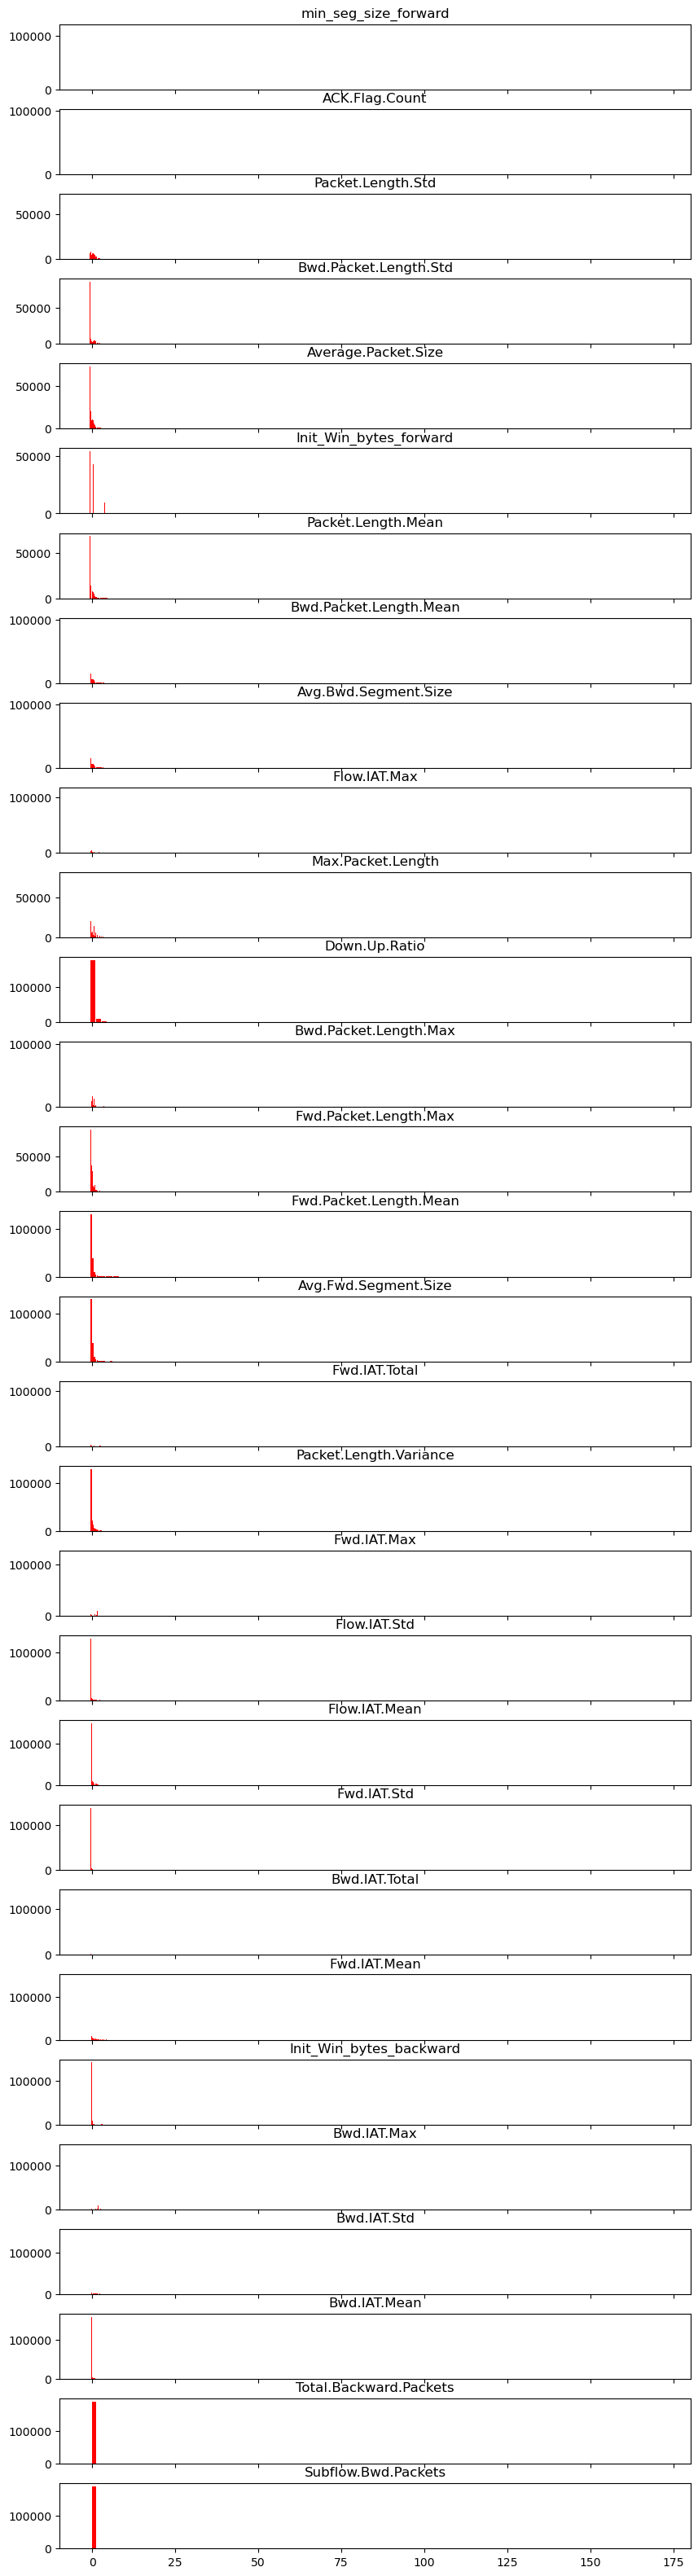

In [30]:
ax = X_scale[top_30_features_by_iqr].\
       hist(bins=100, figsize=(10, 70), layout=(52,1), 
            sharex=True, zorder=2, rwidth=0.9, grid=False, 
            color='red')

## Correlation Matrix

In [31]:
correlation_matrix = data.drop(['ProtocolName'], axis=1).drop(['ProtocolLabel'], axis=1)[top_30_features_by_iqr].corr()
correlation_matrix

min_seg_size_forward  ACK.Flag.Count  \
min_seg_size_forward                 1.000000        0.025238   
ACK.Flag.Count                       0.025238        1.000000   
Packet.Length.Std                   -0.016420       -0.493656   
Bwd.Packet.Length.Std               -0.043545       -0.543089   
Average.Packet.Size                  0.003450       -0.348818   
Init_Win_bytes_forward              -0.102816       -0.396076   
Packet.Length.Mean                   0.001434       -0.349767   
Bwd.Packet.Length.Mean               0.034152       -0.366736   
Avg.Bwd.Segment.Size                 0.034152       -0.366736   
Flow.IAT.Max                         0.034262       -0.024347   
Max.Packet.Length                   -0.012892       -0.361399   
Down.Up.Ratio                       -0.180819        0.045086   
Bwd.Packet.Length.Max               -0.023180       -0.376067   
Fwd.Packet.Length.Max                0.034761       -0.201298   
Fwd.Packet.Length.Mean               0.025343       -0.093794   
Avg.Fwd.Segment.Size                 0.025343       -0.093794   
Fwd.IAT.Total                       -0.016883        0.118299   
Packet.Length.Variance              -0.031564       -0.275773   
Fwd.IAT.Max                          0.006303        0.033957   
Flow.IAT.Std                         0.025239        0.069460   
Flow.IAT.Mean                        0.009359        0.176552   
Fwd.IAT.Std                          0.027892        0.058370   
Bwd.IAT.Total                       -0.007941        0.140971   
Fwd.IAT.Mean                        -0.058493        0.193484   
Init_Win_bytes_backward             -0.133180        0.053759   
Bwd.IAT.Max                          0.018336        0.081045   
Bwd.IAT.Std                          0.027268        0.089523   
Bwd.IAT.Mean                         0.048338        0.186818   
Total.Backward.Packets               0.010727       -0.008602   
Subflow.Bwd.Packets                  0.010727       -0.008602   

                         Packet.Length.Std  Bwd.Packet.Length.Std  \
min_seg_size_forward             -0.016420              -0.043545   
ACK.Flag.Count                   -0.493656              -0.543089   
Packet.Length.Std                 1.000000               0.902175   
Bwd.Packet.Length.Std             0.902175               1.000000   
Average.Packet.Size               0.910697               0.730520   
Init_Win_bytes_forward            0.219915               0.265231   
Packet.Length.Mean                0.910556               0.731447   
Bwd.Packet.Length.Mean            0.869572               0.814692   
Avg.Bwd.Segment.Size              0.869572               0.814692   
Flow.IAT.Max                      0.148317               0.093691   
Max.Packet.Length                 0.888132               0.774560   
Down.Up.Ratio                     0.059148               0.041106   
Bwd.Packet.Length.Max             0.852295               0.831153   
Fwd.Packet.Length.Max             0.414837               0.160681   
Fwd.Packet.Length.Mean            0.312623               0.031692   
Avg.Fwd.Segment.Size              0.312623               0.031692   
Fwd.IAT.Total                     0.136372               0.037864   
Packet.Length.Variance            0.888251               0.786537   
Fwd.IAT.Max                       0.099300               0.049601   
Flow.IAT.Std                      0.006237              -0.033146   
Flow.IAT.Mean                    -0.096069              -0.121550   
Fwd.IAT.Std                       0.027544              -0.014219   
Bwd.IAT.Total                     0.145633               0.042229   
Fwd.IAT.Mean                     -0.100997              -0.121555   
Init_Win_bytes_backward           0.026323               0.006076   
Bwd.IAT.Max                       0.112550               0.049414   
Bwd.IAT.Std                       0.018191              -0.007984   
Bwd.IAT.Mean                     -0.036865              -0.104690   
Total.Ba

## Correlation heatmap

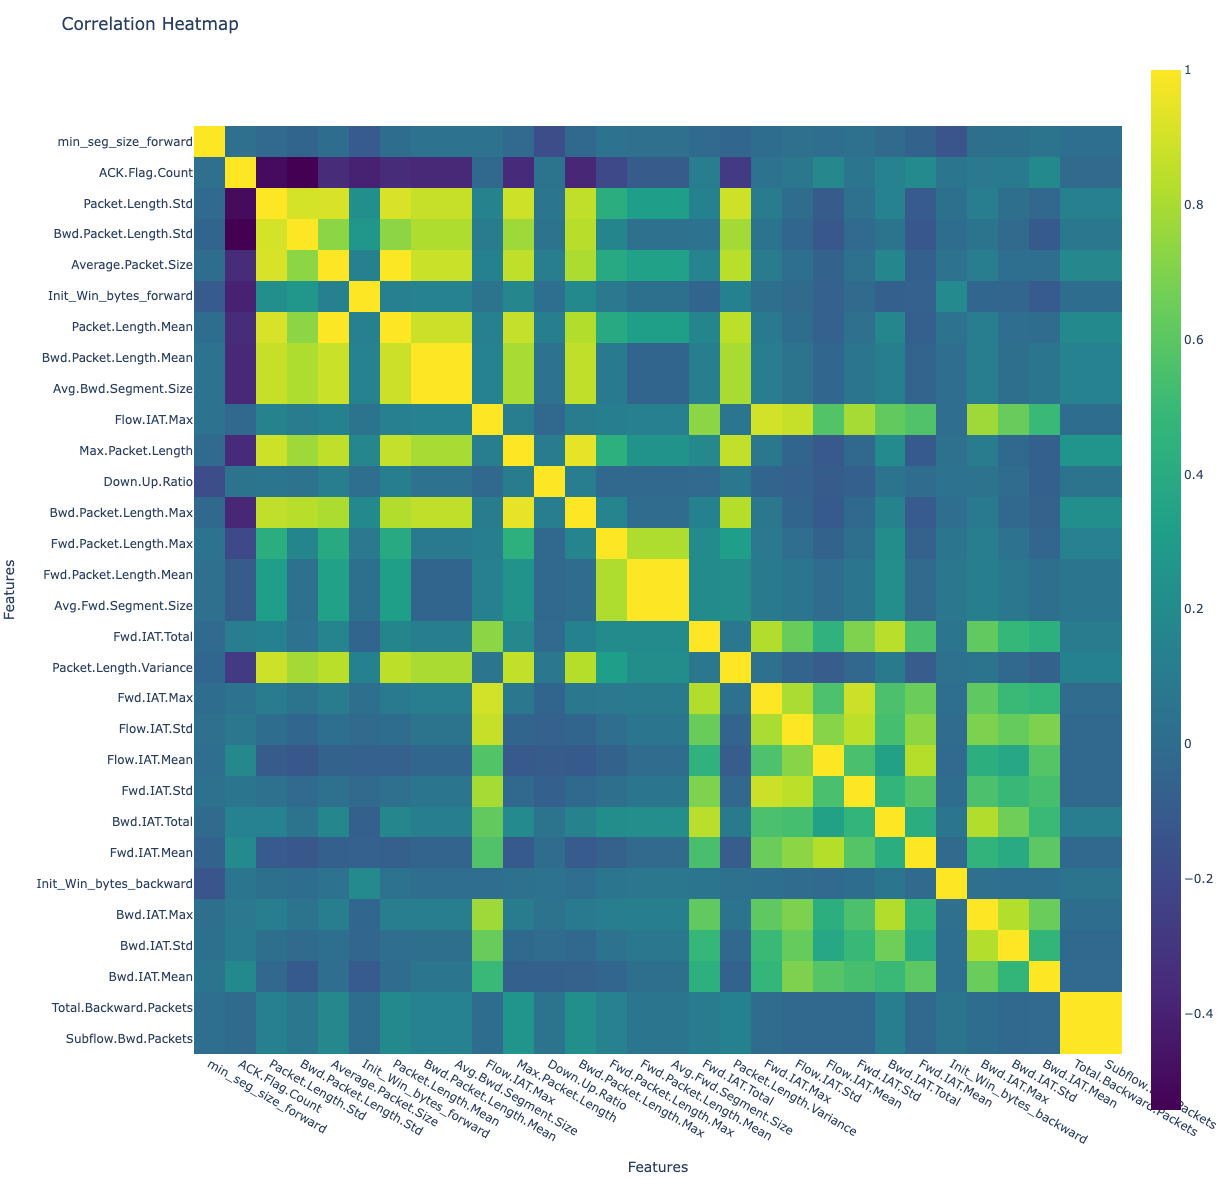

In [32]:
import plotly.express as px


# Create a heatmap figure using Plotly
fig = px.imshow(correlation_matrix, color_continuous_scale='viridis')

# Set axis labels and title
fig.update_xaxes(title_text='Features')
fig.update_yaxes(title_text='Features')
fig.update_layout(
    title='Correlation Heatmap',
    height=1200,  # Set the height of the figure
    width=1200    # Set the width of the figure
)

# Save the plot as an HTML file
fig.write_html('images/correlation_heatmap.html')

# Display the plot (optional)
fig.show()
fig.write_image('images/heatmap.png')

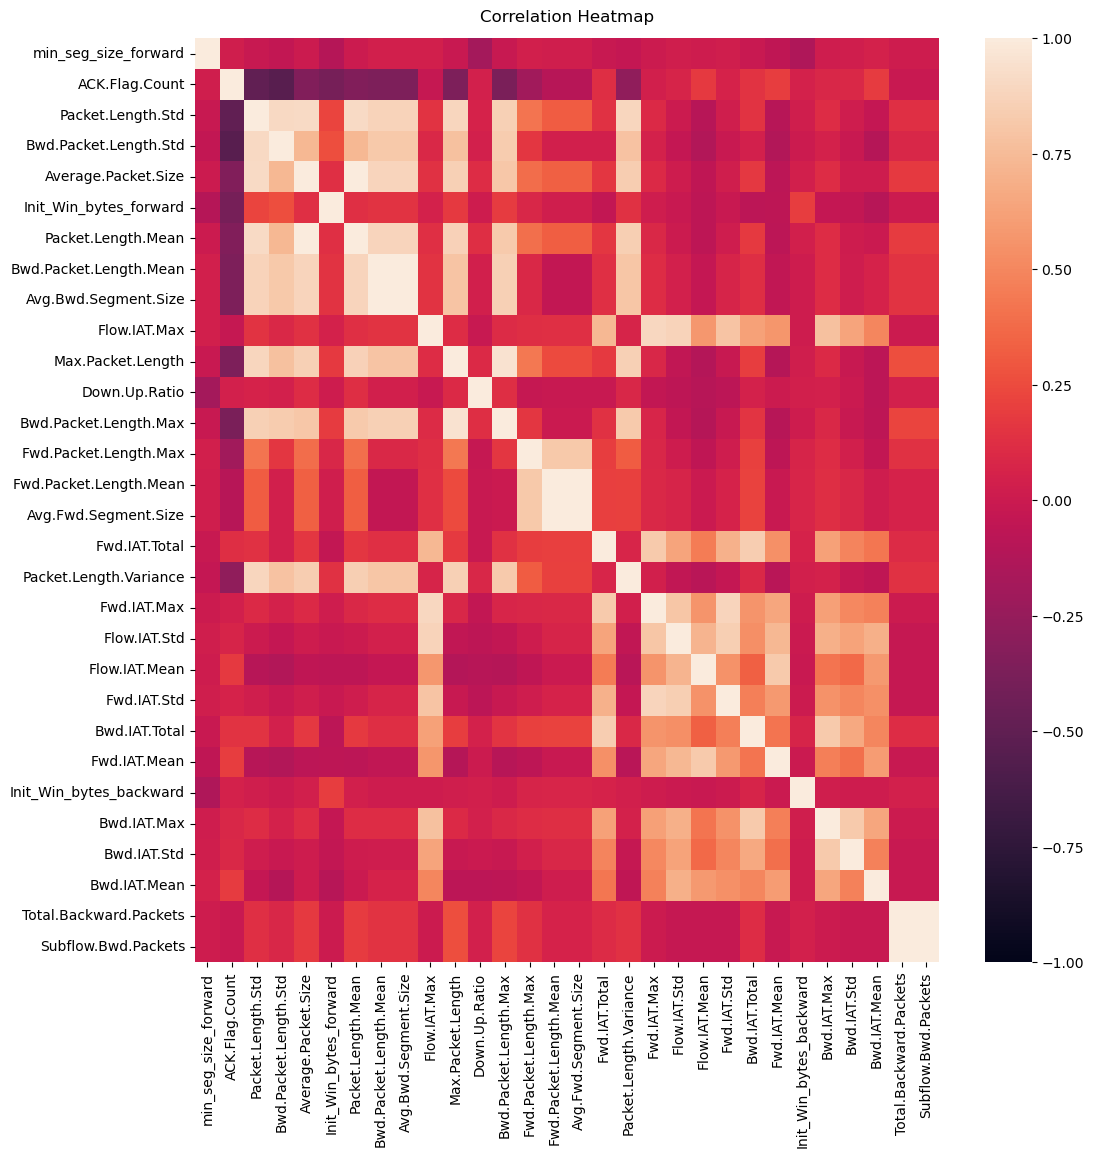

In [33]:
# Another seaborn heatmap so that it would render on github
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Observation from correlation heatmap

**Some of the features are obviously correlated**
- For example most of the packet length related features correlate highly. This is not surprising.
- Similarly some of the IAT values (Bwd and Flow IAT.Max) correlate highly. This is also expected.

**Some features are highly negatively correlated**
- One example is the ACK.Flag.Count to various packet lengths. Here also, there is no surprise, because as packet length increases, the number of acks published for each packet decreases and vice-versa. 

**Outside of the above obvious observations, there was nothing much to note. I will keep all 30 features, inspite of the collinearity between some features.**